# ví dụ trên Python

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

In [35]:
np.random.seed(18)
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis=0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N +[2]*N).T

In [36]:
def kmeans_display(X, label, filename='data.png'):
    X0 = X[label==0, :]
    X1 = X[label==1, :]
    X2 = X[label==2, :]

    kwargs = {"markersize": 5, 'alpha':.8, 'markeredgecolor':'k'}
    plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.plot()
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

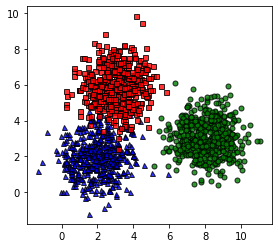

In [37]:
kmeans_display(X, original_label)

các hàm phụ trợ:
- `kmeans_init_centroids` khởi tạo các tâm cụm
- `kmeans_assign_labels` tìm nhãn tất cả các điểm khi biết tâm cụm
- `kmeans_update_centroids` cập nhật lại tâm cụm khi biết các cụm (nhãn của từng điểm)
- `has_converged` kiểm tra điều kiện dừng thuật toán (hội tụ)

In [38]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k)]

def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # print(D.shape)
    # return index of closest centroid
    return np.argmin(D, axis=1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels==k, :]
        #take average
        centroids[k, :] = np.mean(Xk, axis=0)
    return centroids

def has_converged(centroids, new_centroids):
    # return True if two sets of centroids as the same
    return (set(tuple(a) for a in centroids)) == (set(tuple(a) for a in new_centroids))

### phần chính của K-means

In [39]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it+=1
    return (centroids, labels, it)

hiển thị kết quả

Centers found by our algorithm:
 [[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]


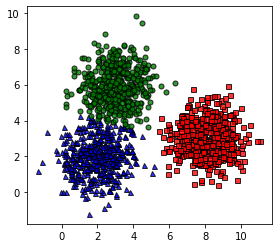

In [40]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1], 'res.png')

# sử dụng thư viện scikit-learn

Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [3.02429957 5.95334038]
 [1.98417154 1.96141961]]


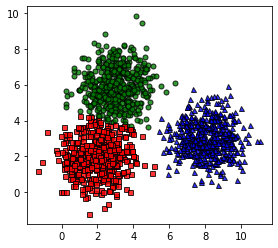

In [41]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label, 'res_scikit.png')

# hiển thị kết quả sau mỗi vòng lặp

### voronoi

In [42]:
from my_voronoi import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi

def kmeans_display_progress(X, centroids, labels, it, filename):
    label = labels[it]
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    # draw data points with color
    kwargs = {"markersize": 5, "alpha": 1, "markeredgecolor": 'k'}
    plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

    # draw centroids
    points = centroids[it]
    kwargs = {"markersize": 15, "markeredgecolor": 'k'}
    animlist = plt.plot(points[0, 0], points[0, 1], 'y^', **kwargs)
    animlist = plt.plot(points[1, 0], points[1, 1], 'yo', **kwargs)
    animlist = plt.plot(points[2, 0], points[2, 1], 'ys', **kwargs)

    # draw color for each voronoi region
    colors = ['b', 'g', 'r']
    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor, radius=1000)
    for i, region in enumerate(regions):
        polygon = vertices[region]
        animlist = plt.fill(*zip(*polygon), alpha=.2, color=colors[i])

    plt.axis('scaled')
    plt.title('iteration: %d/%d' % (it+1, len(labels)))
    plt.axis([-2, 11, -2, 10])
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()


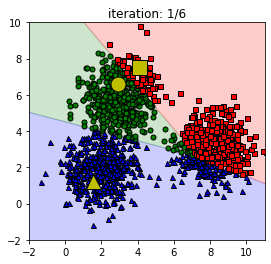

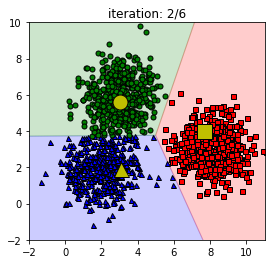

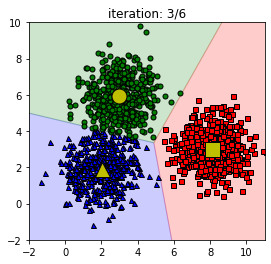

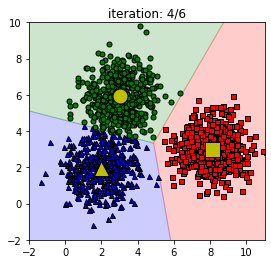

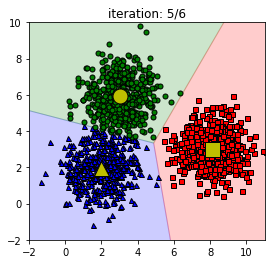

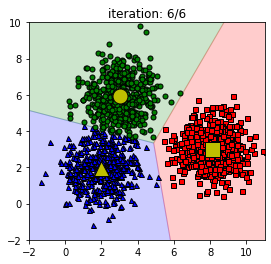

In [43]:
for it in range(6):
    filename = 'ex_' + str(it) + 'notitle.png'
    kmeans_display_progress(X, centroids, labels, it, filename)

# slow convergence

In [44]:
for i in range(6):
    np.random.seed(9*i)
    (centroids, labels, it) = kmeans(X, K)
    print('seed number:', 9*i, 'number of iterations:', len(labels))

seed number: 0 number of iterations: 8
seed number: 9 number of iterations: 8
seed number: 18 number of iterations: 9
seed number: 27 number of iterations: 20
seed number: 36 number of iterations: 7
seed number: 45 number of iterations: 8


=> với các khởi tạo khác nhau, số lượng vòng lặp cũng khác nhau

# nghiệm tìm được không giống nhau

In [45]:
for i in range(60):
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    print(centroids[-1])

[[8.78046073 2.78155578]
 [7.15025799 3.32261946]
 [2.48627752 3.975271  ]]
[[3.02702878 5.95686115]
 [1.9834967  1.96588127]
 [8.07476866 3.01494931]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[8.07476866 3.01494931]
 [1.9834967  1.96588127]
 [3.02702878 5.95686115]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.96588127]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967 

10


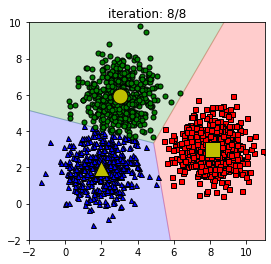

31


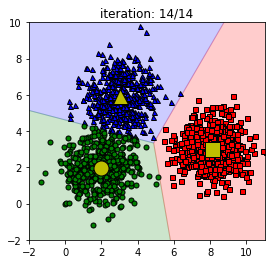

27


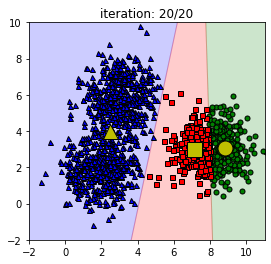

In [46]:
for i in [10, 31, 27]:
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    it = len(labels) - 1
    print(i)
    filename = 'dif_res' + str(i) + '.png'
    kmeans_display_progress(X, centroids, labels, it, filename)

# số lượng điểm chênh lệch

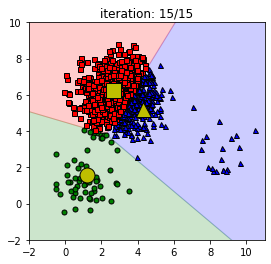

In [47]:
means = [[1, 1], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = [50, 20, 1000]
X0 = np.random.multivariate_normal(means[0], cov, N[0])
X1 = np.random.multivariate_normal(means[1], cov, N[1])
X2 = np.random.multivariate_normal(means[2], cov, N[2])

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

np.random.seed(10)
(centroids, labels, it) = kmeans(X, K)
filename = 'skew_10.png'
kmeans_display_progress(X, centroids, labels, it, filename)


# các cluster ko có dạng hình tròn

seed: 10


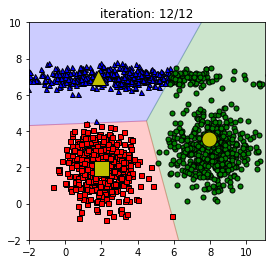

In [48]:
means = [[2, 2], [8, 3], [3, 7]]
cov = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, .1]]

N = [500, 500, 500]
X0 = np.random.multivariate_normal(means[0], cov, N[0])
X1 = np.random.multivariate_normal(means[1], cov, N[1])
X2 = np.random.multivariate_normal(means[2], cov2, N[2])

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3


for i in [10]:
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    print('seed:', i)
    filename = 'notround_' + str(i) + '.png'
    kmeans_display_progress(X, centroids, labels, it, filename)